---
title: "GERON - END-TO-END PROJECT"
author: "Kwabena Asabere"
df-print: kable
code-overflow: wrap
execute:
    echo: true
    warning: false
    message: false
format: html
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv(r"C:\Users\KAsab\Desktop\Analysis_Workshop\data\Heart.csv")

In [3]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart = heart.drop(heart.columns[0],axis = 1)

In [5]:
heart.shape

(303, 14)

In [6]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
## heart.columns = [column.lower() for column in heart.columns]

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [9]:
heart.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [10]:
num_features = heart.select_dtypes(include = "number").columns.to_list()
print(num_features)

['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']


In [11]:
cat_features = heart.select_dtypes(include = "object").columns.to_list()
print(cat_features)

['ChestPain', 'Thal', 'AHD']


In [12]:
heart["ChestPain"].value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [13]:
heart[cat_features].apply(lambda col: col.value_counts())

,ChestPain,Thal,AHD
No,NaN,NaN,164.0
Yes,NaN,NaN,139.0
asymptomatic,144.0,NaN,NaN
fixed,NaN,18.0,NaN
nonanginal,86.0,NaN,NaN
nontypical,50.0,NaN,NaN
normal,NaN,166.0,NaN
reversable,NaN,117.0,NaN
typical,23.0,NaN,NaN


In [14]:
[heart[col].value_counts() for col in cat_features]

[ChestPain
 asymptomatic    144
 nonanginal       86
 nontypical       50
 typical          23
 Name: count, dtype: int64,
 Thal
 normal        166
 reversable    117
 fixed          18
 Name: count, dtype: int64,
 AHD
 No     164
 Yes    139
 Name: count, dtype: int64]

In [15]:
value_counts_list = [heart[col].value_counts() for col in cat_features]
for col, counts in zip(cat_features, value_counts_list):
    print(f"Value counts for {col}:\n{counts}\n")



Value counts for ChestPain:
ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

Value counts for Thal:
Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64

Value counts for AHD:
AHD
No     164
Yes    139
Name: count, dtype: int64



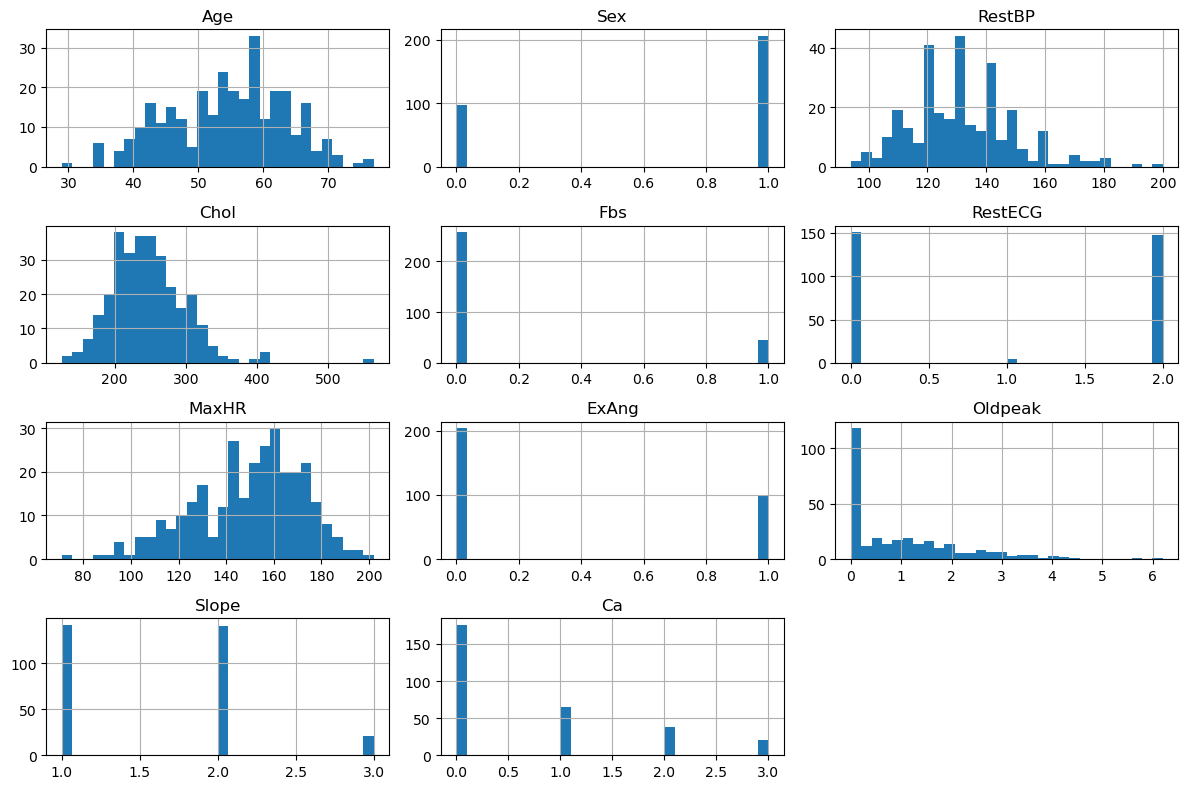

In [16]:
heart[num_features].hist(bins = 30, figsize = (12,8))
plt.tight_layout()
plt.show()

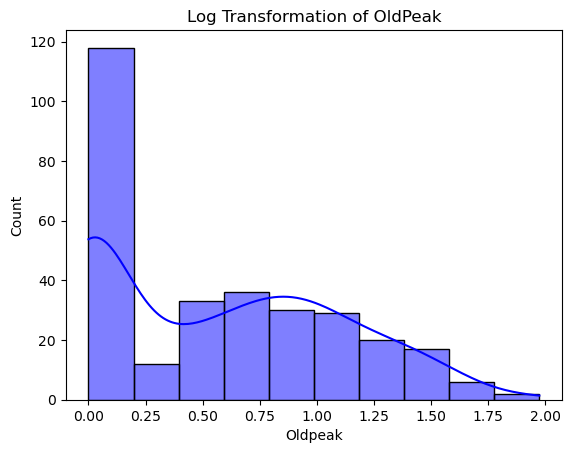

In [17]:
import seaborn as sns

# Plot original and transformed
sns.histplot(np.log1p(heart['Oldpeak']), kde=True, color='blue').set(title="Log Transformation of OldPeak")
plt.show()

<Axes: >

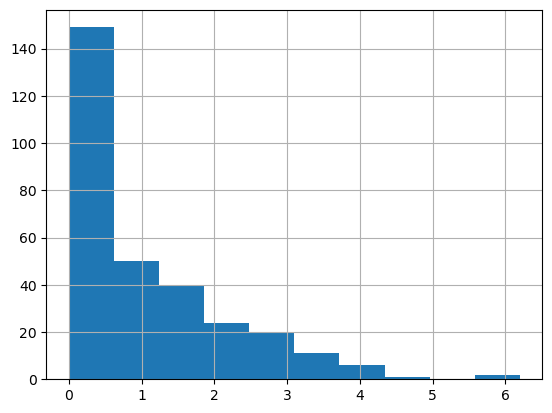

In [18]:
heart["Oldpeak"].hist()

In [19]:
log_oldpeak = np.log1p(heart["Oldpeak"])

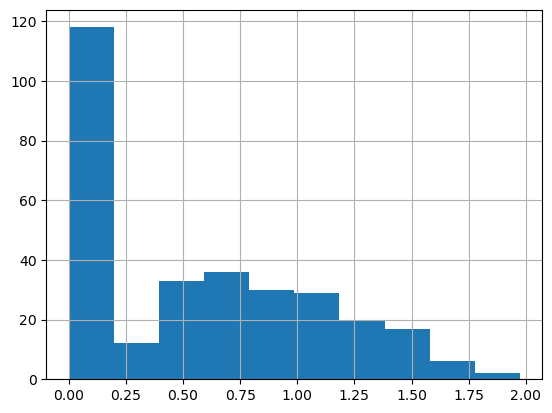

In [20]:
log_oldpeak.hist()
plt.show()